# Prediction using Unsupervised ML : Iris dataset

### Submitted by AKSHAYA DINESH

### problem statement:

* From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
* Here We are using K-Means clustering

### Data set:

* The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

* The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Information from: https://en.wikipedia.org/wiki/Iris_flower_data_set

*  Dataset : https://bit.ly/3kXTdox


<img src="iris.png" width="800" height="600">


In [3]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline


In [4]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:

print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.data.shape) # data consist of 150 rows and 4 columns

(150, 4)


## K means Clustering

* K-means clustering algorithm partitions data into K clusters (and, hence, K-means name). K-means algorithm belongs to the   category, prototype-based clustering. Prototype-based clustering algorithms are based on one of the following: 
    * Centroid-based clusters: Each cluster built around a point which is termed as the centroid (average) of similar points    with continuous features. K-means algorithm results in creation of centroid-based clusters.
    * Medoid-based clusters: Each cluster built around a point which is termed as the medoid which represents the point that minimises the distance to all other points that belong to a particular cluster, in the case of categorical features.

###  How to find most optimal value of K?

The technique used to find the most optimal value of K is draw a reduction in variation vs number of clusters (K) plot. Alternatively, one could draw the squared sum of error (SSE) vs number of clusters (K) plot. Here is the diagram representing the plot of SSE vs K (no. of clusters). In the diagram below, the point representing the optimal number of clusters can also be called as elbow point. The elbow point can be seen as the point after which the distortion/cluster inertia/SSE start decreasing in a linear fashion. 

<img src="reff.png" width="500" height="600">

In [12]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

* init (default as k-means++): Represents method for initialisation. The default value of k-means++ represents the selection of the initial cluster centers (centroids) in a smart manner (place the initial centroids far away from each other ) to speed up the convergence. The other values of init can be random, which represents the selection of n_clusters observations at random from data for the initial centroids.
* n_init (default as 10): Represents the number of time the k-means algorithm will be run independently, with different random centroids in order to choose the final model as the one with the lowest SSE.
* max_iter (default as 300): Represents the maximum number of iterations for each run. The iteration stops after the maximum number of iterations is reached even if the convergence criterion is not satisfied. This number must be between 1 and 999. In this paper (Scalable K-Means by ranked retrieval), the authors stated that K-means converges after 20-50 iterations in all practical situations, even on high dimensional datasets as they tested. 

### Plot the graph for find optimum value 

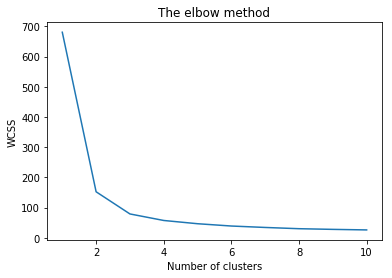

In [13]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

* From the graph 'within sum of square' vs ' Number of clusters', the optimum number of cluster is '3'.
* Hence 3 is the elbow point.
* After  which the distortion/cluster inertia/SSE start decreasing in a linear fashion. 



## Implement K-means clustering

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualize clusters 

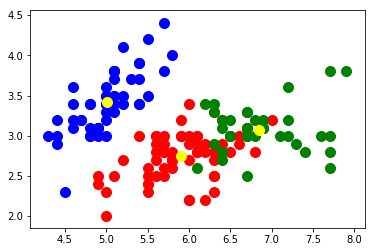

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')



#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

## Conclusion 

* K-means clustering algorithm results in creation of clusters around centroid (average) of similar points with continuous features.
* The objective function of the K-means is within-cluster sum of squared errors (SSE). SSE is squared sum of different between each observation and the cluster centroid.
* The optimal number of clusters, K, can be found by drawing sum of squared errors vs number of clusters point.

##  Reference

* https://vitalflux.com/k-means-clustering-explained-with-python-example/
*  https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html